<a href="https://colab.research.google.com/github/navyakarna/DEEP_LEARNING_PROJECTS/blob/main/IMAGE_GENERATOR_AND_FIT_GENERATOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from zipfile import ZipFile

# Specify the path to your zip file
zip_file_path = '/content/RSeKNqHaROqx8hMcig62_Emergency Vs Non-Emergency Vehicle Dataset (1).zip'

# Specify the directory where you want to extract the contents
extract_to_path = '/content/'

# Open the zip file
with ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(extract_to_path)

print(f"Extracted files to {extract_to_path}")

Extracted files to /content/


In [4]:
seed = 42

In [6]:
data = pd.read_csv('Dataset/emergency_classification.csv')

In [7]:
X = []
for img_name in data.image_names:
  img = plt.imread('/content/Dataset/images/' + img_name) #conecting the path
  X.append(img)

X=np.array(X) #used numpy to convert images to array

y = data.emergency_or_not.values

In [11]:
X_train, X_valid, y_train , y_valid = train_test_split(X, y , test_size=0.3, random_state=seed)
print("X_train:", X_train.shape, "X_valid:", X_valid.shape)
print("y_train:", y_train.shape, "y_valid", y_valid.shape)

X_train: (1646, 224, 224, 3) X_valid: (706, 224, 224, 3)
y_train: (1646,) y_valid (706,)


IMAGE AUGMENTATION USING KERAS (IMAGEDATAGENERATOR)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
image_augmentation = ImageDataGenerator(rotation_range=30, width_shift_range=40, height_shift_range=40, horizontal_flip=True, vertical_flip=True, fill_mode="nearest")

In [15]:
image_augmentation.fit(X_train)

In [17]:
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [18]:
adam = Adam(learning_rate = 1e-5)


In [19]:
model=Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(loss="Binary_crossentropy", optimizer=adam, metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [26]:
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Replace:
# model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=120, validation_data=(X_valid, y_valid), epochs=50))

# With:
model_history = model.fit(image_augmentation.flow(X_train, y_train, batch_size=120),
                         validation_data=(X_valid, y_valid),
                         epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5168 - loss: 0.9956 - val_accuracy: 0.5609 - val_loss: 0.7656
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5351 - loss: 0.9856 - val_accuracy: 0.5609 - val_loss: 0.7755
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5117 - loss: 0.9245 - val_accuracy: 0.5609 - val_loss: 0.7637
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4759 - loss: 0.8139 - val_accuracy: 0.5609 - val_loss: 0.7551
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4737 - loss: 0.7392 - val_accuracy: 0.5609 - val_loss: 0.7482
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4842 - loss: 0.8072 - val_accuracy: 0.5609 - val_loss: 0.7420
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4976 - loss: 0.7920 - val_accuracy: 0.5609 - val_loss: 0.7444
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5143 - loss: 0.7524 - val_accuracy: 0.5609 - val_loss: 0.7407
Epo

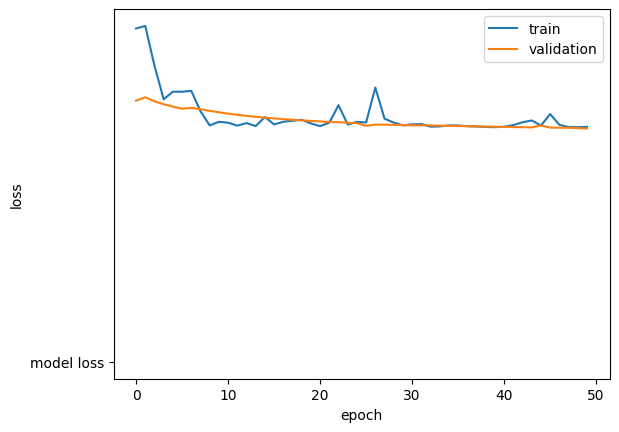

In [28]:
# Access the training history using the `history` attribute
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.plot('model loss') # Consider removing this as plotting a string does not produce meaningful visualization.
plt.ylabel('loss') # The Y-axis was wrongly labeled as 'accuracy'
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc="upper right")

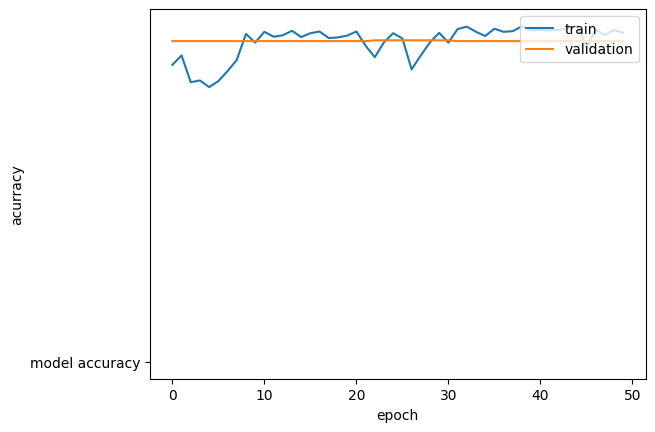

In [29]:
# Access the training history using the `history` attribute
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.plot('model accuracy') # Consider removing this as plotting a string does not produce meaningful visualization.
plt.ylabel('acurracy') # The Y-axis was wrongly labeled as 'accuracy'
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc="upper right")